## Task 0 - Data ingestion

In [1]:
import duckdb
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

conn = duckdb.connect(duckdb_path)
with open("sql/load_sakila.sql") as ingest_scripts:
    conn.sql(ingest_scripts.read())



## Task 1 - EDA in python

In [4]:
# Task 1a
long_films = conn.sql("SELECT title, length FROM film WHERE length > 180").df()
print("Filmer över 180 minuter:")
display(long_films)

Filmer över 180 minuter:


,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


In [5]:
# Task 1b
love_films = conn.sql("SELECT title, rating, length, description FROM film WHERE title LIKE '%LOVE%'").df()
print("Filmer med 'LOVE' i titeln:")
display(love_films)

Filmer med 'LOVE' i titeln:


,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [6]:
# Task 1c
movie_length = conn.sql ("""
SELECT  
    MIN(length) AS shortest_movie,
    AVG(length) AS average_length,
    MEDIAN(length) AS median_length,
    MAX(length) AS longest_movie
 FROM film""").df()

print("Djupare statistik gällande filmernas längd:")
display(movie_length)

Djupare statistik gällande filmernas längd:


,shortest_movie,average_length,median_length,longest_movie
0,46,115.272,114.0,185


In [7]:
# Task 1d
expensive_movies = ("""
SELECT
    title,
    rental_rate,
    rental_duration,
    (rental_rate / rental_duration) AS cost_per_day
FROM film
ORDER BY cost_per_day DESC
LIMIT 10""")

expensive_movies = conn.sql(expensive_movies).df()

print("De 10 dyraste filmerna att hyra per dag är:")
display(expensive_movies)

De 10 dyraste filmerna att hyra per dag är:


,title,rental_rate,rental_duration,cost_per_day
0,AMERICAN CIRCUS,4.99,3,1.663333
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BILKO ANONYMOUS,4.99,3,1.663333
3,BEAST HUNCHBACK,4.99,3,1.663333
4,CARIBBEAN LIBERTY,4.99,3,1.663333
5,AUTUMN CROW,4.99,3,1.663333
6,CASPER DRAGONFLY,4.99,3,1.663333
7,ACE GOLDFINGER,4.99,3,1.663333
8,BEHAVIOR RUNAWAY,4.99,3,1.663333
9,CASUALTIES ENCINO,4.99,3,1.663333


In [ ]:
# Task 1e 
actors = """
SELECT 
    a.first_name, 
    a.last_name, 
    COUNT(fa.film_id) AS movie_count
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY movie_count DESC
LIMIT 10
"""
top_actors = conn.sql(actors).df()

print("Topp 10 skådespelare baserat på antal filmer:")
display(top_actors)

Topp 10 skådespelare baserat på antal filmer:


,first_name,last_name,movie_count
0,GINA,DEGENERES,42
1,WALTER,TORN,41
2,MARY,KEITEL,40
3,MATTHEW,CARREY,39
4,SANDRA,KILMER,37
5,SCARLETT,DAMON,36
6,ANGELA,WITHERSPOON,35
7,VAL,BOLGER,35
8,HENRY,BERRY,35
9,VIVIEN,BASINGER,35


In [9]:
# TAsk 1f - question 1 - How many actors first name start with the letter P
actors_p = """
SELECT COUNT(*) AS actors_starting_with_P
FROM actor
WHERE first_name LIKE 'P%'
"""
print("Antal skådespelare vars förnamt börjar på P:")
display(conn.sql(actors_p).df())

Antal skådespelare vars förnamt börjar på P:


,actors_starting_with_P
0,5


In [10]:
#Task 1f - question 2 - How many movies are under the category "Sport"
sport_category = """
SELECT COUNT(*) AS sport_movie_count
FROM film_category fc
JOIN category c ON fc.category_id = c.category_id
WHERE c.name = 'Sports'
"""

print("Antal filmer i kategorin Sports:")
display(conn.sql(sport_category).df())

Antal filmer i kategorin Sports:


,sport_movie_count
0,74


In [11]:
#Task 1f - question 3 - Which are the 5 longest movies
longest_films = """
SELECT title, length
FROM film
ORDER BY length DESC
LIMIT 5
"""

print("De 5 längsta filmerna i databasen:")
display(conn.sql(longest_films).df())

De 5 längsta filmerna i databasen:


,title,length
0,CHICAGO NORTH,185
1,CONTROL ANTHEM,185
2,GANGS PRIDE,185
3,DARN FORRESTER,185
4,HOME PITY,185


## Task 2 - Graphs

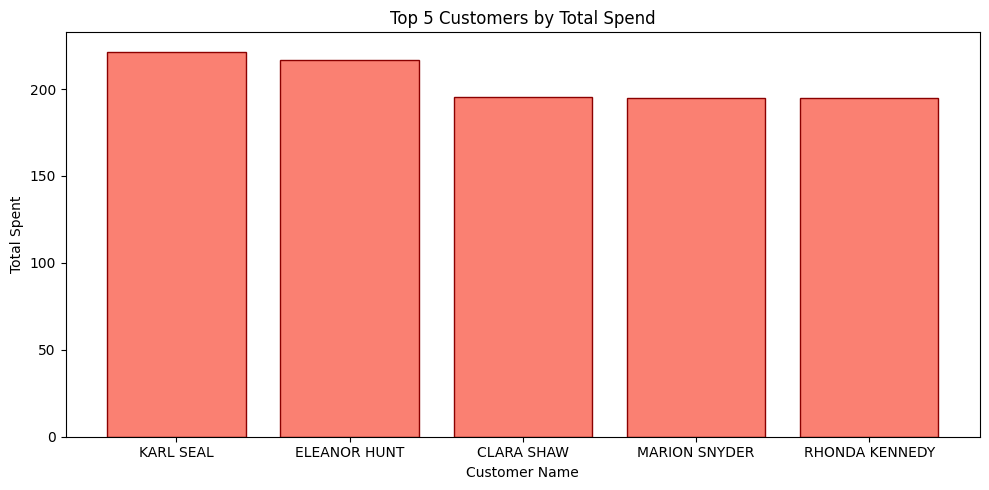

In [ ]:
# a) Top 5 customers graph
top_customers = """
SELECT 
    first_name || ' ' || last_name AS customer_name, 
    SUM(p.amount) AS total_spent
FROM customer c
JOIN payment p ON c.customer_id = p.customer_id
GROUP BY c.customer_id, first_name, last_name
ORDER BY total_spent DESC
LIMIT 5
"""

df_customers = conn.sql(top_customers).df()

# Skapar grafen
plt.figure(figsize=(10, 5))
plt.bar(df_customers['customer_name'], df_customers['total_spent'], color='salmon', edgecolor='darkred')
plt.title('Top 5 Customers by Total Spend')
plt.xlabel('Customer Name')
plt.ylabel('Total Spent')

# vIsualisering av grafen
plt.tight_layout()
plt.show()

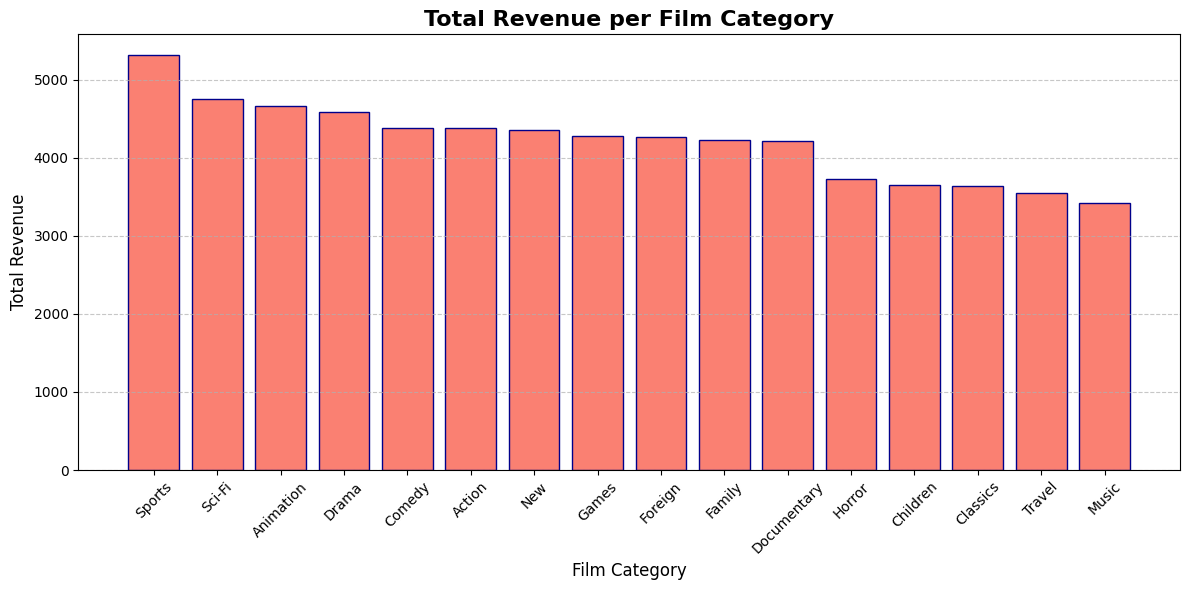

In [7]:
# b) Total revenue per film category
revenue_category = """
SELECT 
    c.name AS category, 
    SUM(p.amount) AS total_revenue
FROM category c
JOIN film_category fc ON c.category_id = fc.category_id
JOIN film f           ON fc.film_id = f.film_id
JOIN inventory i      ON f.film_id = i.film_id
JOIN rental r         ON i.inventory_id = r.inventory_id
JOIN payment p         ON r.rental_id = p.rental_id
GROUP BY c.name
ORDER BY total_revenue DESC
"""


df_revenue = conn.sql(revenue_category).df()

# Skapa grafen
plt.figure(figsize=(12, 6))
plt.bar(df_revenue['category'], df_revenue['total_revenue'], color='salmon', edgecolor='darkblue')
plt.title('Total Revenue per Film Category', fontsize=16, fontweight='bold')
plt.xlabel('Film Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visualisering av grafen
plt.tight_layout()
plt.show()